# Rabinizer 3.1 - automaton with empty acceptance

In [7]:
import spot
spot.setup(show_default='.a')

In [112]:
def simpl(form):
    f = spot.formula(form).simplify().unabbreviate('WM')
    display(f)
    return f.to_str(parenth=True)

In [118]:
f2 = 'Ga & X(a & Gb)'
f = simpl(f2)

Ga & X(a & Gb)

The automaton produced by Rabinizer 3.1 accepts empty language which is not equal to the formula

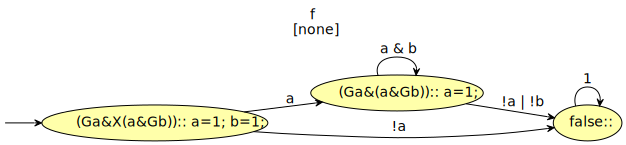

In [120]:
spot.automaton('java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std "' + f + '" |')

In [121]:
!java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std '{f}'

HOA: v1
tool: "Rabinizer" "3.1"
name: "Automaton for (Ga&X(a&Gb)):: a=1; b=1;"
properties: deterministic
properties: complete
States: 3
Start: 0
acc-name: generalized-Rabin 0
Acceptance: 0 f
AP: 2 "a" "b"
--BODY--
State: 1 "(Ga&(a&Gb)):: a=1;" 
[0&1] 1 {}
[(0&!1|!0)] 2 {}
State: 2 "false::" 
[t] 2 {}
State: 0 "(Ga&X(a&Gb)):: a=1; b=1;" 
[0] 1 {}
[!0] 2 {}
--END--



Confirm by `ltlcross`

In [119]:
!ltlcross -t ltl2tgba -t 'java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std %[RWM]f > %O' -f "{f}"

(G(a)) & (X((a) & (G(b))))
Running [P0]: ltl2tgba -H '(G(a)) & (X((a) & (G(b))))'>'lcr-o0-YXEOhs'
Running [P1]: java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std '(G(a)) & (X((a) & (G(b))))' > 'lcr-o1-MNZuPC'
Running [N0]: ltl2tgba -H '!((G(a)) & (X((a) & (G(b)))))'>'lcr-o0-MWrQHN'
Running [N1]: java -jar ../Rab3/rabinizer3.1.jar -silent -format=hoa -out=std '!((G(a)) & (X((a) & (G(b)))))' > 'lcr-o1-3iy4BY'
Performing sanity checks and gathering statistics...
error: Comp(N1)*Comp(P1) is nonempty; both automata accept the infinite word:
       cycle{a & b}
error: {P0} disagree with {P1} when evaluating the state-space
       the following word(s) are not accepted by {P1}:
  P0 accepts: a & !b; cycle{a & b}

error: some error was detected during the above runs,
       please search for 'error:' messages in the above trace.


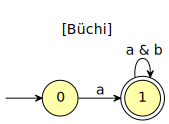

In [122]:
spot.translate(f)